In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("Data/fake reviews dataset.csv")

In [45]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [46]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [47]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

In [48]:
print(df.isnull().sum())
df = df.drop_duplicates(subset='text_')


category    0
rating      0
label       0
text_       0
dtype: int64


In [49]:
# CG = Computer-generated fake reviews = 0
# OR = Original reviews (presumably human created and authentic) = 1

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [56]:
df_dummies = pd.get_dummies(df['category'])

df = pd.concat([df, df_dummies], axis=1)
print(obs_df.columns)

Index(['category', 'rating', 'label', 'text_', 'Books_5',
       'Clothing_Shoes_and_Jewelry_5', 'Electronics_5', 'Home_and_Kitchen_5',
       'Kindle_Store_5', 'Movies_and_TV_5', 'Pet_Supplies_5',
       'Sports_and_Outdoors_5', 'Tools_and_Home_Improvement_5',
       'Toys_and_Games_5'],
      dtype='object')


In [57]:
df.head()

,category,rating,label,text_,Books_5,Clothing_Shoes_and_Jewelry_5,Electronics_5,Home_and_Kitchen_5,Kindle_Store_5,Movies_and_TV_5,Pet_Supplies_5,Sports_and_Outdoors_5,Tools_and_Home_Improvement_5,Toys_and_Games_5
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",0,0,0,1,0,0,0,0,0,0
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",0,0,0,1,0,0,0,0,0,0
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,0,0,0,1,0,0,0,0,0,0
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",0,0,0,1,0,0,0,0,0,0
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,0,0,0,1,0,0,0,0,0,0


In [51]:
target_var  = 'label'
feature_var = ['category', 'rating', 'text_'] 

X = df[feature_var]
Y = df[target_var]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=101)


In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28302, 3)
(12130, 3)
(28302,)
(12130,)


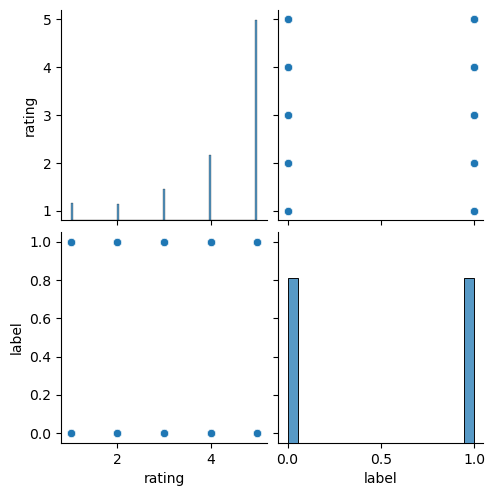

In [52]:
feature_var = ['category', 'rating', 'text_']
sns.pairplot(df[cols])